# Boltzmann Lattice (Fluid flow)

## Simulation setup & execution

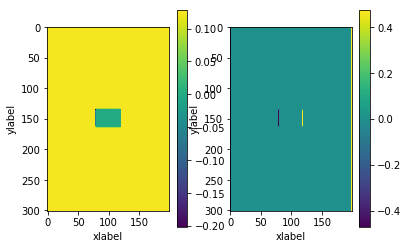

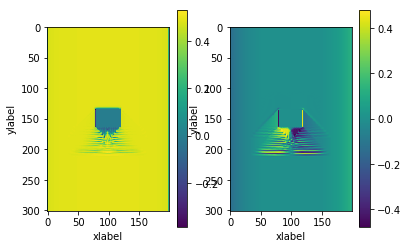

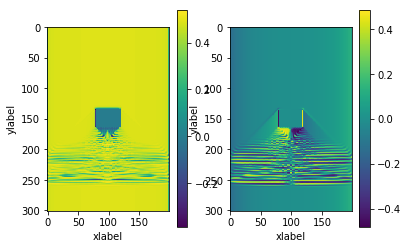

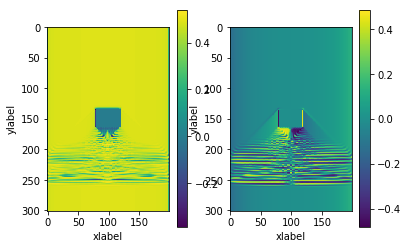

Maximum number of iterations (100) have been reached. It is adviced to increase the maximum number of iterations or increase the error tolerance (epsilon).
Total run time = 7.631091594696045


In [6]:
import time as tm
from types import SimpleNamespace
from Boltzmann_simulation import *
from constants import *

start_time = tm.time()

# Create name space
sim = SimpleNamespace()

# Assign system dimensions/parameters
sim.L, sim.W = 300, 200
sim.m = 1
sim.P = 1
sim.epsilon = 0#0.0001
sim.max_iterations = 100
sim.plot_iteration = 50
sim.nu = 0.2
sim.dv = 0.05

# Square obstacle
sim.L_ratio = 1/10  # Length of the object wrt length of the system
sim.W_ratio = 1/5 # Width of the object wrt length of the system

#Load constants
sim = constants(sim)

# Actual simulation
par = boltzmann_sim(sim)

Reynolds_pipe, Reynolds_obs = Reynolds(sim, par)
    
end_time = tm.time()
total_time = end_time - start_time
print('Total run time =', total_time)

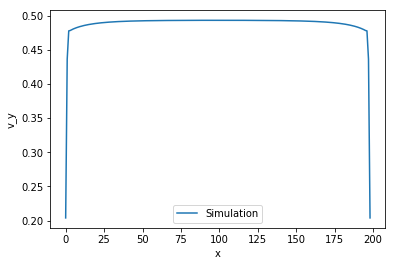

In [2]:
# Theoretical values (60*20, nu = 2, dv = 0.01)
data_slice = par.u[0,1:sim.W_in,0]
plt.plot(data_slice, label = 'Simulation')

x = np.linspace(0, len(data_slice) - 1, len(data_slice))
y = -sim.dv/(2*sim.nu)*(x-(len(data_slice) - 1)/2)**2 
y = y - min(y)
#plt.plot(x, y, '--', label = 'Theoretical')
plt.xlabel('x')
plt.ylabel('v_y')
plt.legend()
plt.show()

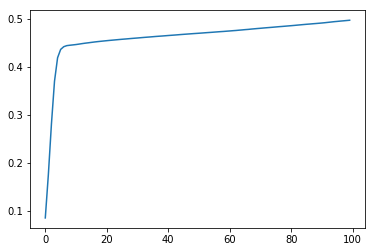

In [3]:
plt.plot(par.v_tot)
plt.show()

# To Do

- Implement intial densities  (now just set to 0), make sure that upper and lower boundary are set to 0.
- Implement pressure gradient (hence for in x direction) (In forcing function)
- Namespace for results (needed for data processing)
- Add movie (-> under construction)